## CIFAR-10

### Prepare the data

- ```x_train```: NumPy array of grayscale image data: shapes **(50000, 32, 32, 3)**. Pixel values range from **0 to 255**.

- ```y_train```: NumPy array of digit labels (integers in range 0-9): shape **(50000, 1)**.

- ```x_test```: NumPy array of grayscale image data: shapes **(10000, 32, 32, 3)**. Pixel values range from **0 to 255**.

- ```y_test```: NumPy array of digit labels (integers in range 0-9): shape **(10000, 1)**.

- 0	airplane
- 1	automobile
- 2	bird
- 3	cat
- 4	deer
- 5	dog
- 6	frog
- 7	horse
- 8	ship
- 9	truck

In [7]:
import tensorflow
from tensorflow import keras

In [8]:
num_classes = 10

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [9]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [11]:
import matplotlib.pyplot as plt


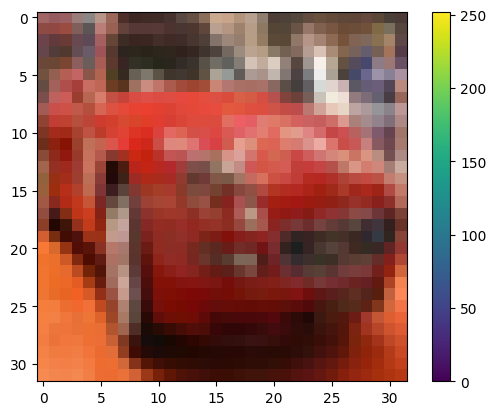

In [12]:
plt.figure()
plt.imshow(x_train[5])
plt.colorbar()
plt.grid(False)
plt.show()

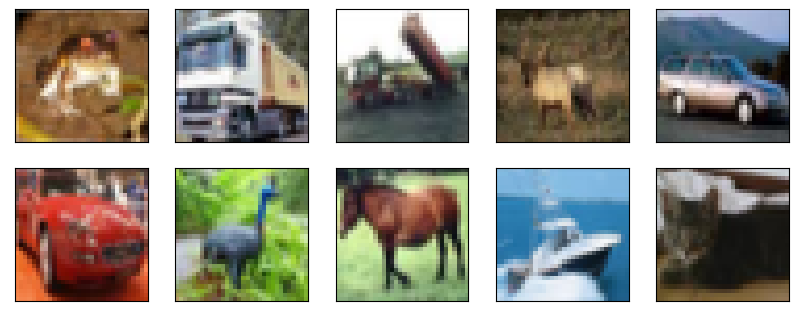

In [13]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

In [14]:
# Normalizing pixels
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
50000 train samples
10000 test samples


In [15]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

### Build the model

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)), #RGB : Red Green Blue
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 256)               786688    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 803,786
Trainable params: 803,786
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [25]:
batch_size = 64
epochs = 15

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
704/704 [==============================] - 5s 6ms/step - loss: 21.0070 - accuracy: 0.1328 - val_loss: 2.3103 - val_accuracy: 0.0948
Epoch 2/15
704/704 [==============================] - 4s 6ms/step - loss: 2.3018 - accuracy: 0.1018 - val_loss: 2.3085 - val_accuracy: 0.0952
Epoch 3/15
704/704 [==============================] - 4s 6ms/step - loss: 2.3026 - accuracy: 0.0998 - val_loss: 2.3082 - val_accuracy: 0.0952
Epoch 4/15
704/704 [==============================] - 6s 8ms/step - loss: 2.3024 - accuracy: 0.0983 - val_loss: 2.3075 - val_accuracy: 0.0958
Epoch 5/15
704/704 [==============================] - 6s 9ms/step - loss: 2.3029 - accuracy: 0.0971 - val_loss: 2.3074 - val_accuracy: 0.0958
Epoch 6/15
704/704 [==============================] - 6s 8ms/step - loss: 2.3027 - accuracy: 0.0965 - val_loss: 2.3052 - val_accuracy: 0.0976
Epoch 7/15
704/704 [==============================] - 5s 6ms/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3054 - val_accuracy: 0.0970
Epoch

### Evaluate the trained model

In [26]:
score = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

313/313 - 1s - loss: 2.3026 - accuracy: 0.1000 - 698ms/epoch - 2ms/step
Test loss: 2.3026347160339355
Test accuracy: 0.10000000149011612


In [27]:
prediction = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [31]:
import numpy as np

In [32]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[np.max(true_label)],
                                color=color))

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[np.max(true_label)].set_color('blue')

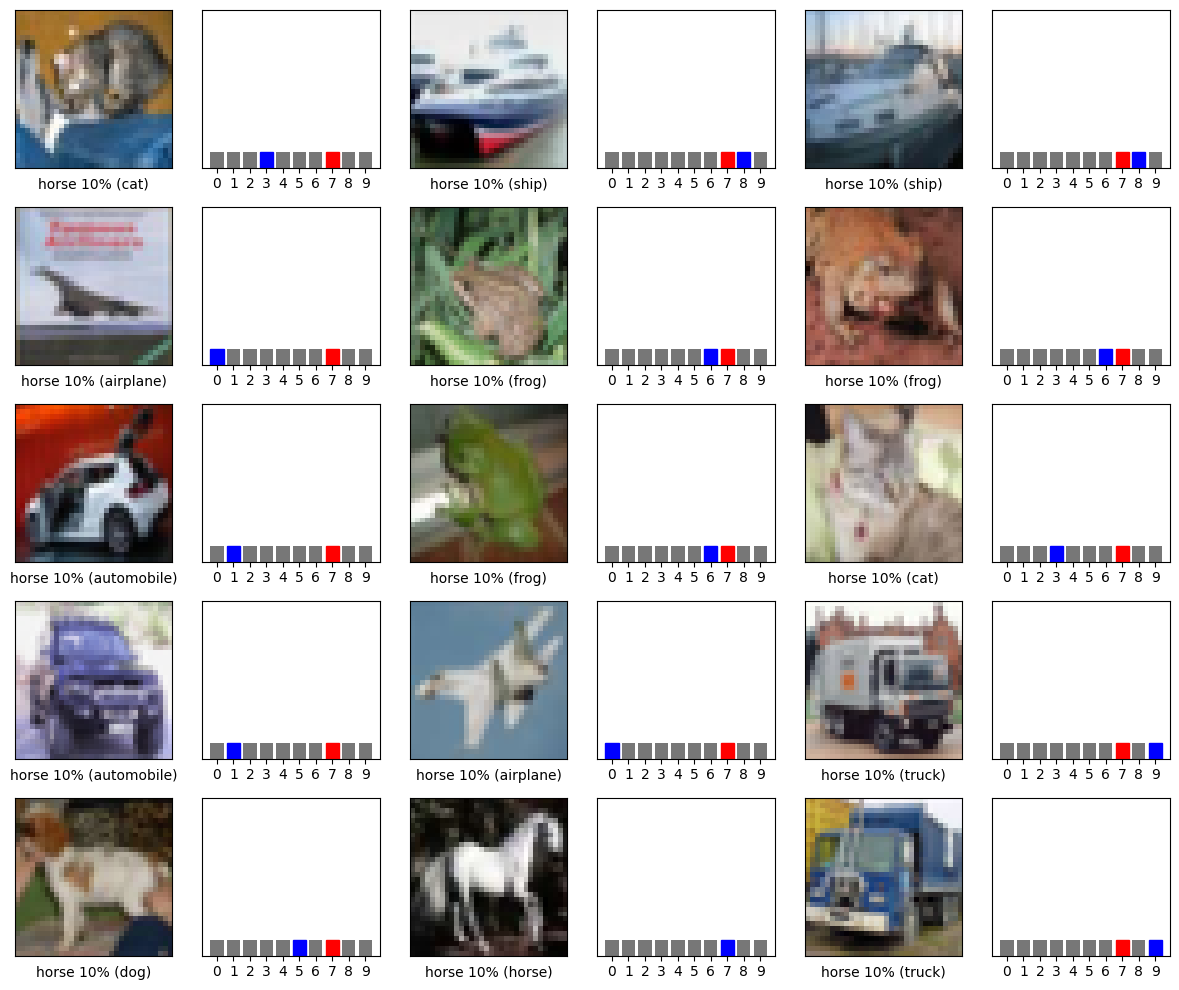

In [33]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prediction[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prediction[i], y_test)
plt.tight_layout()
plt.show()

In [34]:
import itertools
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[   0    0    0    0    0    0    0 1000    0    0]
 [   0    0    0    0    0    0    0 1000    0    0]
 [   0    0    0    0    0    0    0 1000    0    0]
 [   0    0    0    0    0    0    0 1000    0    0]
 [   0    0    0    0    0    0    0 1000    0    0]
 [   0    0    0    0    0    0    0 1000    0    0]
 [   0    0    0    0    0    0    0 1000    0    0]
 [   0    0    0    0    0    0    0 1000    0    0]
 [   0    0    0    0    0    0    0 1000    0    0]
 [   0    0    0    0    0    0    0 1000    0    0]]


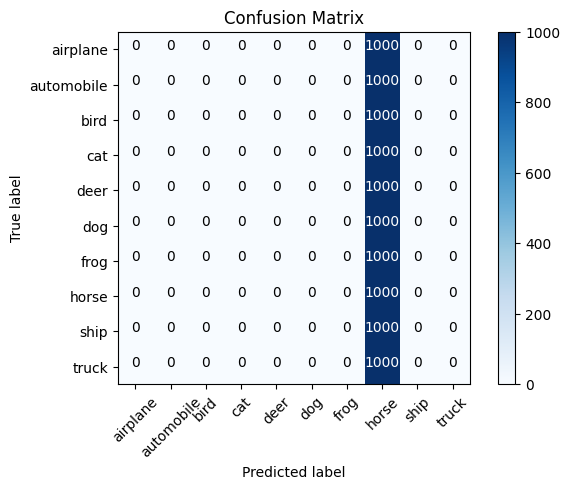

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_test, prediction.argmax(axis=1))
plot_confusion_matrix(cm=matrix, classes=class_names, title='Confusion Matrix')